In [1]:
import pandas as pd
path ='https://github.com/DS-100/textbook/raw/master/content/ch/'
baby = pd.read_csv(path + '03/babynames.csv')
baby

,Name,Sex,Count,Year
0,Mary,F,9217,1884
1,Anna,F,3860,1884
2,Emma,F,2587,1884
3,Elizabeth,F,2549,1884
4,Minnie,F,2243,1884
...,...,...,...,...
1891889,Titus,M,5,1883
1891890,Toney,M,5,1883
1891891,Verna,M,5,1883
1891892,Winnie,M,5,1883


In [2]:
 # Row labeled 1, Column labeled 'Name'
baby.loc[1, 'Name']

'Anna'

In [3]:
# Get rows 1 through 5, columns Name through Count inclusive
baby.loc[1:5, 'Name':'Count']

,Name,Sex,Count
1,Anna,F,3860
2,Emma,F,2587
3,Elizabeth,F,2549
4,Minnie,F,2243
5,Margaret,F,2142


In [4]:
baby.loc[:, ['Name', 'Year']]

,Name,Year
0,Mary,1884
1,Anna,1884
2,Emma,1884
3,Elizabeth,1884
4,Minnie,1884
...,...,...
1891889,Titus,1883
1891890,Toney,1883
1891891,Verna,1883
1891892,Winnie,1883


In [5]:
baby[['Name', 'Count']]

,Name,Count
0,Mary,9217
1,Anna,3860
2,Emma,2587
3,Elizabeth,2549
4,Minnie,2243
...,...,...
1891889,Titus,5
1891890,Toney,5
1891891,Verna,5
1891892,Winnie,5


In [6]:
baby['Year'] == 2016

0          False
1          False
2          False
3          False
4          False
           ...  
1891889    False
1891890    False
1891891    False
1891892    False
1891893    False
Name: Year, Length: 1891894, dtype: bool

In [7]:
baby_2016 = baby.loc[baby['Year'] == 2016, :]
baby_2016

,Name,Sex,Count,Year
1850880,Emma,F,19414,2016
1850881,Olivia,F,19246,2016
1850882,Ava,F,16237,2016
1850883,Sophia,F,16070,2016
1850884,Isabella,F,14722,2016
...,...,...,...,...
1883743,Zolton,M,5,2016
1883744,Zurich,M,5,2016
1883745,Zyahir,M,5,2016
1883746,Zyel,M,5,2016


In [8]:
sorted_2016 = baby_2016.sort_values('Count', ascending=False)
sorted_2016

,Name,Sex,Count,Year
1850880,Emma,F,19414,2016
1850881,Olivia,F,19246,2016
1869637,Noah,M,19015,2016
1869638,Liam,M,18138,2016
1850882,Ava,F,16237,2016
...,...,...,...,...
1868754,Mikenzi,F,5,2016
1868753,Mikela,F,5,2016
1868752,Mikaelyn,F,5,2016
1868751,Miette,F,5,2016


In [9]:
# Get the value in the zeroth row, zeroth column
sorted_2016.iloc[0, 0]

'Emma'

In [10]:
# Get the first five rows
sorted_2016.iloc[0:5]

,Name,Sex,Count,Year
1850880,Emma,F,19414,2016
1850881,Olivia,F,19246,2016
1869637,Noah,M,19015,2016
1869638,Liam,M,18138,2016
1850882,Ava,F,16237,2016


In [11]:
# Counting the number of rows where each year appears.
year_counts = baby[['Year', 'Count']].groupby('Year').count()
year_counts

,Count
Year,
1880,2000
1881,1935
1882,2127
1883,2084
1884,2297
...,...
2012,33715
2013,33253
2014,33206


In [12]:
grouped_counts = baby.groupby(['Year', 'Sex']).sum()
grouped_counts

Count
Year Sex         
1880 F      90992
     M     110491
1881 F      91953
     M     100743
1882 F     107847
...           ...
2014 M    1913434
2015 F    1776538
     M    1907211
2016 F    1756647
     M    1880674

[274 rows x 1 columns]

In [13]:
# The most popular name is simply the 
#first one that appears in the series
def most_popular(series):
    return series.iloc[0]

baby_pop = baby.groupby(['Year', 'Sex']).agg(most_popular)
baby_pop

Name  Count
Year Sex             
1880 F    Mary   7065
     M    John   9655
1881 F    Mary   6919
     M    John   8769
1882 F    Mary   8148
...        ...    ...
2014 M    Noah  19263
2015 F    Emma  20415
     M    Noah  19594
2016 F    Emma  19414
     M    Noah  19015

[274 rows x 2 columns]

In [14]:
baby_pop.loc[(2000, 'F'), 'Name']

'Emily'

In [15]:
baby_pop.iloc[10:15, :]

Name  Count
Year Sex             
1885 F    Mary   9128
     M    John   8756
1886 F    Mary   9889
     M    John   9026
1887 F    Mary   9888

In [16]:
pd.pivot_table(baby,
               index='Year',         # Index for rows
               columns='Sex',        # Columns
               values='Name',        # Values in table
               aggfunc=most_popular) # Aggregation function

Sex,F,M
Year,,
1880,Mary,John
1881,Mary,John
1882,Mary,John
1883,Mary,John
1884,Mary,John
...,...,...
2012,Sophia,Jacob
2013,Sophia,Noah
2014,Emma,Noah


In [17]:
names = baby['Name']
names.apply(len)

0          4
1          4
2          4
3          9
4          6
          ..
1891889    5
1891890    5
1891891    5
1891892    6
1891893    8
Name: Name, Length: 1891894, dtype: int64

In [18]:
def last_letter(string):
    return string[-1]

names.apply(last_letter)

0          y
1          a
2          a
3          h
4          e
          ..
1891889    s
1891890    y
1891891    a
1891892    e
1891893    p
Name: Name, Length: 1891894, dtype: object

In [19]:
baby['Last'] = names.str[-1]
baby

,Name,Sex,Count,Year,Last
0,Mary,F,9217,1884,y
1,Anna,F,3860,1884,a
2,Emma,F,2587,1884,a
3,Elizabeth,F,2549,1884,h
4,Minnie,F,2243,1884,e
...,...,...,...,...,...
1891889,Titus,M,5,1883,s
1891890,Toney,M,5,1883,y
1891891,Verna,M,5,1883,a
1891892,Winnie,M,5,1883,e


In [20]:
letter_dist = (baby[['Last', 'Sex', 'Count']]
    .groupby(['Last', 'Sex']).sum())
letter_dist

Count
Last Sex          
a    F    58079486
     M     1931630
b    F       17376
     M     1435939
c    F       30262
     M     1672407
d    F      754233
     M    16412640
e    F    37421616
     M    14730974
f    F        2351
     M      209841
g    F       36688
     M      600100
h    F     8162723
     M     6931003
i    F     3871335
     M      898543
j    F        3443
     M       33794
k    F       40979
     M     5404580
l    F     5839793
     M    15063703
m    F      431566
     M     5849707
n    F    20131081
     M    38061648
o    F      410450
     M     4302986
p    F        4502
     M      684530
q    F         680
     M       13413
r    F     3977752
     M    10285468
s    F     3711303
     M    17335581
t    F     2506572
     M     9495720
u    F       88159
     M       86218
v    F        4674
     M       52571
w    F       55505
     M     3067727
x    F       37381
     M      644092
y    F    24877638
     M    18569388
z    F      142023
     M      120123

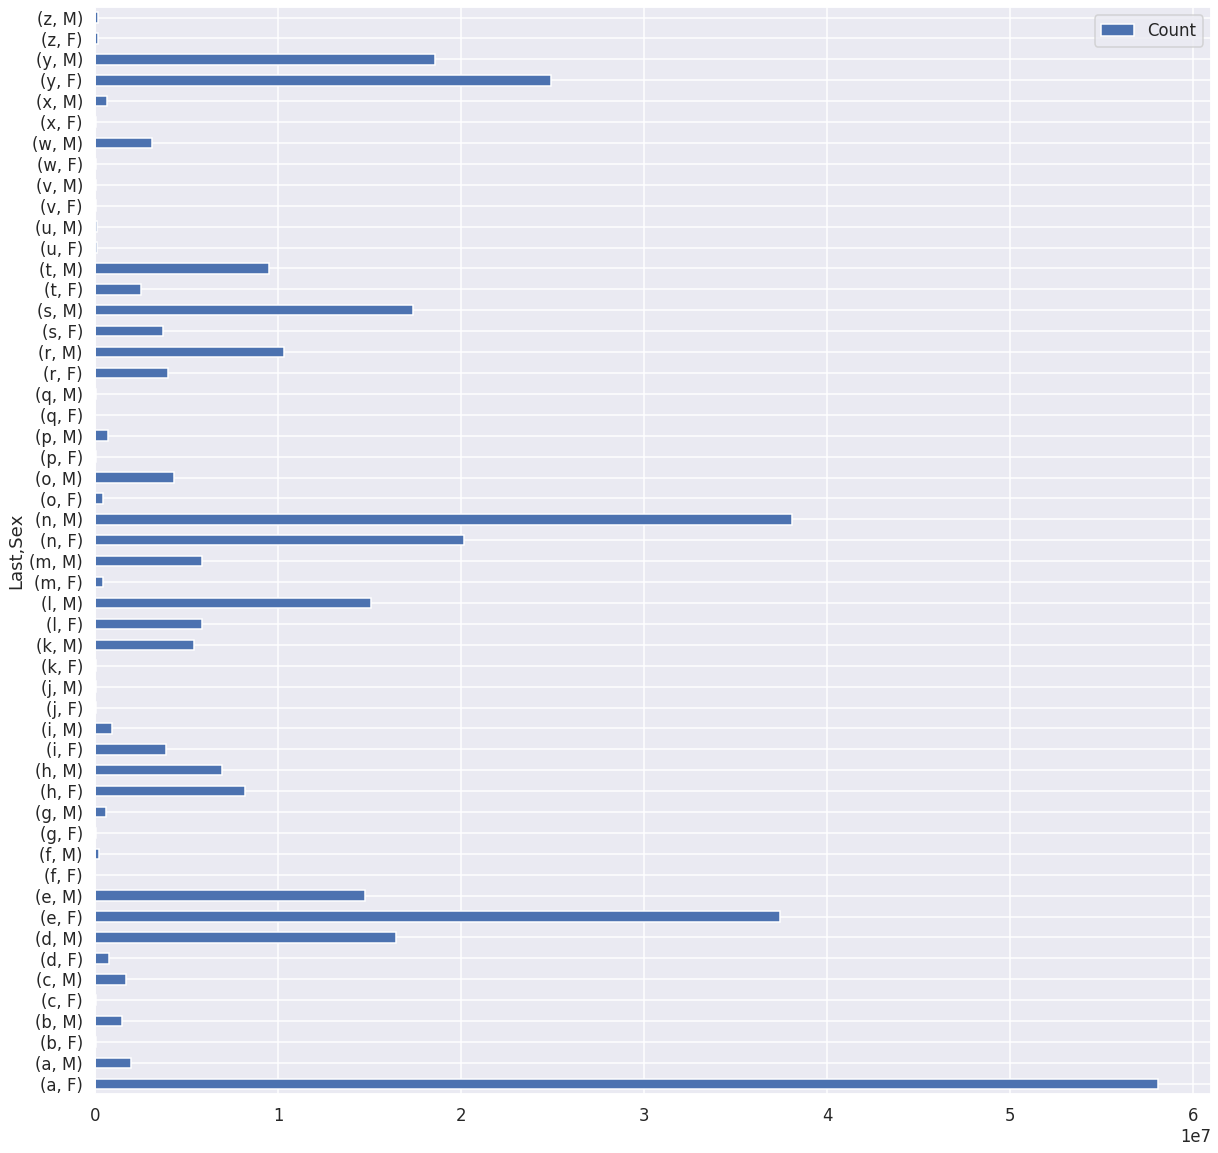

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_context('talk')
letter_dist.plot.barh(figsize=(20, 20))

In [22]:
letter_pivot = pd.pivot_table(baby, index='Last', 
    columns='Sex', values='Count', aggfunc='sum')
letter_pivot

Sex,F,M
Last,,
a,58079486,1931630
b,17376,1435939
c,30262,1672407
d,754233,16412640
e,37421616,14730974
f,2351,209841
g,36688,600100
h,8162723,6931003
i,3871335,898543


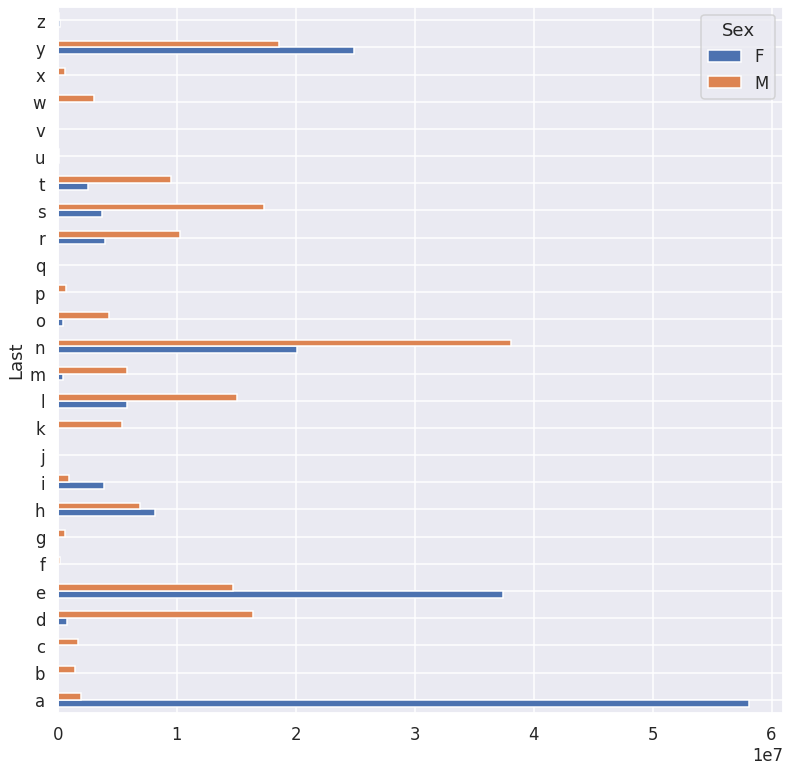

In [23]:
letter_pivot.plot.barh(figsize=(13, 13))

In [24]:
total_for_each_letter = letter_pivot['F'] + letter_pivot['M']
letter_pivot['F prop'] = letter_pivot['F'] / total_for_each_letter
letter_pivot['M prop'] = letter_pivot['M'] / total_for_each_letter
letter_pivot

Sex,F,M,F prop,M prop
Last,,,,
a,58079486,1931630,0.967812,0.032188
b,17376,1435939,0.011956,0.988044
c,30262,1672407,0.017773,0.982227
d,754233,16412640,0.043935,0.956065
e,37421616,14730974,0.717541,0.282459
f,2351,209841,0.011080,0.988920
g,36688,600100,0.057614,0.942386
h,8162723,6931003,0.540802,0.459198
i,3871335,898543,0.811621,0.188379


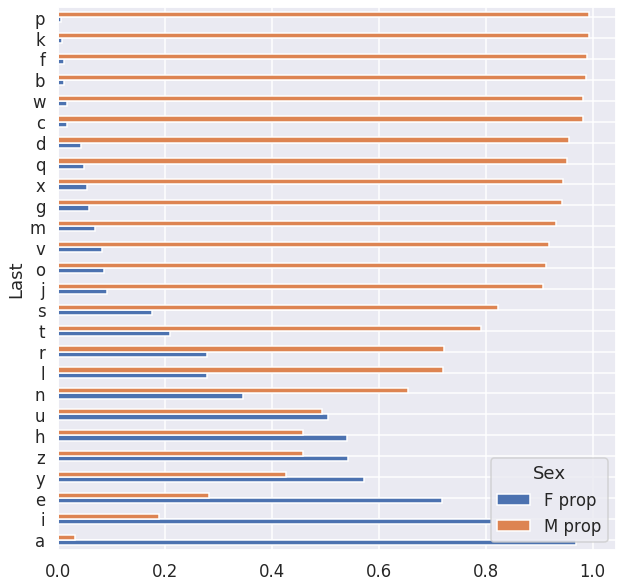

In [25]:
(letter_pivot[['F prop', 'M prop']].sort_values('M prop') 
  .plot.barh(figsize=(10, 10)))
